# Data Profiling and Validation

## Objective
Comprehensive data understanding and quality assessment of the Ames Housing dataset to establish baseline characteristics and validate data integrity for subsequent analysis.

## Contents
1. Data Loading and Initial Assessment
2. Automated Data Profiling
3. Statistical Validation
4. Data Type Optimization
5. Missing Value Analysis
6. Feature Distribution Analysis
7. Data Quality Summary


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


## 1. Data Loading and Initial Assessment


In [3]:
# Load the dataset
df = pd.read_csv('../../data/raw/train.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()


Dataset Shape: (1460, 81)

First 5 rows:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Basic dataset information
print("Dataset Info:")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]:,}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Duplicated Rows: {df.duplicated().sum()}")

print("\nData Types Distribution:")
print(df.dtypes.value_counts())


Dataset Info:
Rows: 1,460
Columns: 81
Memory Usage: 3.43 MB
Duplicated Rows: 0

Data Types Distribution:
object     43
int64      35
float64     3
Name: count, dtype: int64


## 2. Automated Data Profiling


In [5]:
def data_profiling_report(dataframe):
    """Generate comprehensive data profiling report"""
    
    profile = {
        'column': [],
        'dtype': [],
        'non_null_count': [],
        'null_count': [],
        'null_percentage': [],
        'unique_count': [],
        'unique_percentage': [],
        'most_frequent_value': [],
        'frequency_of_most_frequent': []
    }
    
    for col in dataframe.columns:
        profile['column'].append(col)
        profile['dtype'].append(str(dataframe[col].dtype))
        profile['non_null_count'].append(dataframe[col].count())
        profile['null_count'].append(dataframe[col].isnull().sum())
        profile['null_percentage'].append(round(dataframe[col].isnull().mean() * 100, 2))
        profile['unique_count'].append(dataframe[col].nunique())
        profile['unique_percentage'].append(round(dataframe[col].nunique() / len(dataframe) * 100, 2))
        
        if dataframe[col].count() > 0:
            most_frequent = dataframe[col].value_counts().index[0]
            frequency = dataframe[col].value_counts().iloc[0]
            profile['most_frequent_value'].append(most_frequent)
            profile['frequency_of_most_frequent'].append(frequency)
        else:
            profile['most_frequent_value'].append(None)
            profile['frequency_of_most_frequent'].append(0)
    
    return pd.DataFrame(profile)

# Generate profiling report
profile_df = data_profiling_report(df)
print("Data Profiling Report:")
profile_df


Data Profiling Report:


,column,dtype,non_null_count,null_count,null_percentage,unique_count,unique_percentage,most_frequent_value,frequency_of_most_frequent
0,Id,int64,1460,0,0.00,1460,100.00,1,1
1,MSSubClass,int64,1460,0,0.00,15,1.03,20,536
2,MSZoning,object,1460,0,0.00,5,0.34,RL,1151
3,LotFrontage,float64,1201,259,17.74,110,7.53,60.0,143
4,LotArea,int64,1460,0,0.00,1073,73.49,7200,25
5,Street,object,1460,0,0.00,2,0.14,Pave,1454
6,Alley,object,91,1369,93.77,2,0.14,Grvl,50
7,LotShape,object,1460,0,0.00,4,0.27,Reg,925
8,LandContour,object,1460,0,0.00,4,0.27,Lvl,1311
9,Utilities,object,1460,0,0.00,2,0.14,AllPub,1459


In [6]:
# Identify columns with missing values
missing_data = profile_df[profile_df['null_percentage'] > 0].sort_values('null_percentage', ascending=False)
print(f"Columns with missing values: {len(missing_data)}")
if len(missing_data) > 0:
    print("\nTop 10 columns with highest missing percentage:")
    print(missing_data[['column', 'null_count', 'null_percentage']].head(10))


Columns with missing values: 19

Top 10 columns with highest missing percentage:
          column  null_count  null_percentage
72        PoolQC        1453            99.52
74   MiscFeature        1406            96.30
6          Alley        1369            93.77
73         Fence        1179            80.75
25    MasVnrType         872            59.73
57   FireplaceQu         690            47.26
3    LotFrontage         259            17.74
58    GarageType          81             5.55
59   GarageYrBlt          81             5.55
60  GarageFinish          81             5.55


## 3. Statistical Validation


In [7]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric columns: {len(numeric_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

# Statistical summary for numeric columns
print("\nNumeric Columns Statistical Summary:")
df[numeric_cols].describe()


Numeric columns: 38
Categorical columns: 43

Numeric Columns Statistical Summary:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Outlier detection using IQR method
def detect_outliers_iqr(dataframe, columns):
    """Detect outliers using Interquartile Range method"""
    outlier_summary = []
    
    for col in columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)][col]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(dataframe)) * 100
        
        outlier_summary.append({
            'column': col,
            'outlier_count': outlier_count,
            'outlier_percentage': round(outlier_percentage, 2),
            'lower_bound': round(lower_bound, 2),
            'upper_bound': round(upper_bound, 2)
        })
    
    return pd.DataFrame(outlier_summary)

# Detect outliers in numeric columns
outlier_df = detect_outliers_iqr(df, numeric_cols)
outlier_df_filtered = outlier_df[outlier_df['outlier_count'] > 0].sort_values('outlier_percentage', ascending=False)

print("Outlier Analysis (IQR Method):")
print(f"Columns with outliers: {len(outlier_df_filtered)}")
if len(outlier_df_filtered) > 0:
    print("\nTop 10 columns with highest outlier percentage:")
    print(outlier_df_filtered[['column', 'outlier_count', 'outlier_percentage']].head(10))


Outlier Analysis (IQR Method):
Columns with outliers: 31

Top 10 columns with highest outlier percentage:
           column  outlier_count  outlier_percentage
30  EnclosedPorch            208               14.25
10     BsmtFinSF2            167               11.44
5     OverallCond            125                8.56
32    ScreenPorch            116                7.95
1      MSSubClass            103                7.05
8      MasVnrArea             96                6.58
2     LotFrontage             88                6.03
18   BsmtHalfBath             82                5.62
29    OpenPorchSF             77                5.27
3         LotArea             69                4.73


## 4. Data Type Optimization


In [17]:
# Memory optimization function
def optimize_memory_usage(dataframe):
    """Optimize memory usage by converting data types"""
    original_memory = dataframe.memory_usage(deep=True).sum() / 1024**2
    
    optimized_df = dataframe.copy()
    
    for col in optimized_df.columns:
        col_type = optimized_df[col].dtype
        
        if col_type != 'object':
            c_min = optimized_df[col].min()
            c_max = optimized_df[col].max()
            
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    optimized_df[col] = optimized_df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    optimized_df[col] = optimized_df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    optimized_df[col] = optimized_df[col].astype(np.int32)
                    
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    optimized_df[col] = optimized_df[col].astype(np.float32)
        
        else:
            # Convert object columns to category if cardinality is low
            unique_ratio = optimized_df[col].nunique() / len(optimized_df)
            if unique_ratio < 0.5:  # Less than 50% unique values
                optimized_df[col] = optimized_df[col].astype('category')
    
    optimized_memory = optimized_df.memory_usage(deep=True).sum() / 1024**2
    reduction = (original_memory - optimized_memory) / original_memory * 100
    
    print(f"Original memory usage: {original_memory:.2f} MB")
    print(f"Optimized memory usage: {optimized_memory:.2f} MB")
    print(f"Memory reduction: {reduction:.2f}%")
    
    return optimized_df

# Apply memory optimization
df_optimized = optimize_memory_usage(df)

print("\nData types after optimization:")
# Convert dtypes to string names for proper aggregation
dtype_counts = df_optimized.dtypes.astype(str).value_counts()
print(dtype_counts)


Original memory usage: 3.43 MB
Optimized memory usage: 0.18 MB
Memory reduction: 94.64%

Data types after optimization:
category    43
int16       21
int8        12
float32      3
int32        2
Name: count, dtype: int64


Original dataset column types:
- 43 object columns
- 35 int64 columns
- 3 float64 columns

All object columns were converted to category type, int64 columns were downcast to int8, int16, or int32 as appropriate, and float64 columns were converted to float32 to optimize memory usage.

## 5. Missing Value Analysis


Missing Value Analysis:
                    column  missing_count  missing_percentage data_type
PoolQC              PoolQC           1453           99.520548    object
MiscFeature    MiscFeature           1406           96.301370    object
Alley                Alley           1369           93.767123    object
Fence                Fence           1179           80.753425    object
MasVnrType      MasVnrType            872           59.726027    object
FireplaceQu    FireplaceQu            690           47.260274    object
LotFrontage    LotFrontage            259           17.739726   float64
GarageType      GarageType             81            5.547945    object
GarageYrBlt    GarageYrBlt             81            5.547945   float64
GarageFinish  GarageFinish             81            5.547945    object
GarageQual      GarageQual             81            5.547945    object
GarageCond      GarageCond             81            5.547945    object
BsmtExposure  BsmtExposure             3

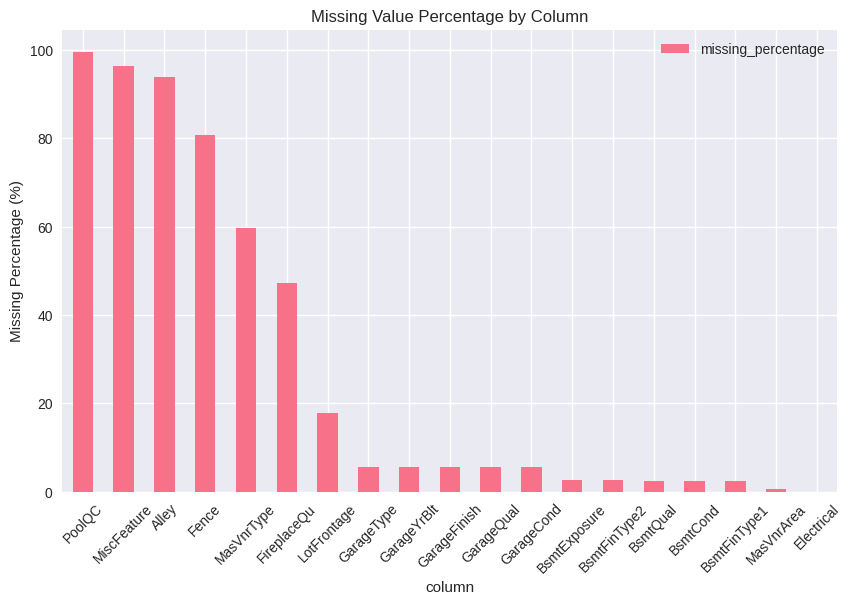

In [22]:
# Comprehensive missing value analysis
def missing_value_analysis(dataframe):
    """Analyze missing value patterns"""
    
    missing_df = pd.DataFrame({
        'column': dataframe.columns,
        'missing_count': dataframe.isnull().sum(),
        'missing_percentage': (dataframe.isnull().sum() / len(dataframe)) * 100,
        'data_type': dataframe.dtypes
    })
    
    missing_df = missing_df[missing_df['missing_count'] > 0].sort_values('missing_percentage', ascending=False)
    
    if len(missing_df) > 0:
        print("Missing Value Analysis:")
        print(missing_df)
        
        # Visualize missing values pattern
        plt.figure(figsize=(10, 6))
        missing_df.plot(x='column', y='missing_percentage', kind='bar', ax=plt.gca())
        plt.title('Missing Value Percentage by Column')
        plt.xticks(rotation=45)
        plt.ylabel('Missing Percentage (%)')
        plt.show()
        
    else:
        print("No missing values found in the dataset!")
        
    return missing_df

# Perform missing value analysis
missing_analysis = missing_value_analysis(df)


## 6. Feature Distribution Analysis


Target Variable Analysis (SalePrice):
Mean: $180,921.20
Median: $163,000.00
Standard Deviation: $79,442.50
Min: $34,900.00
Max: $755,000.00
Skewness: 1.883
Kurtosis: 6.536


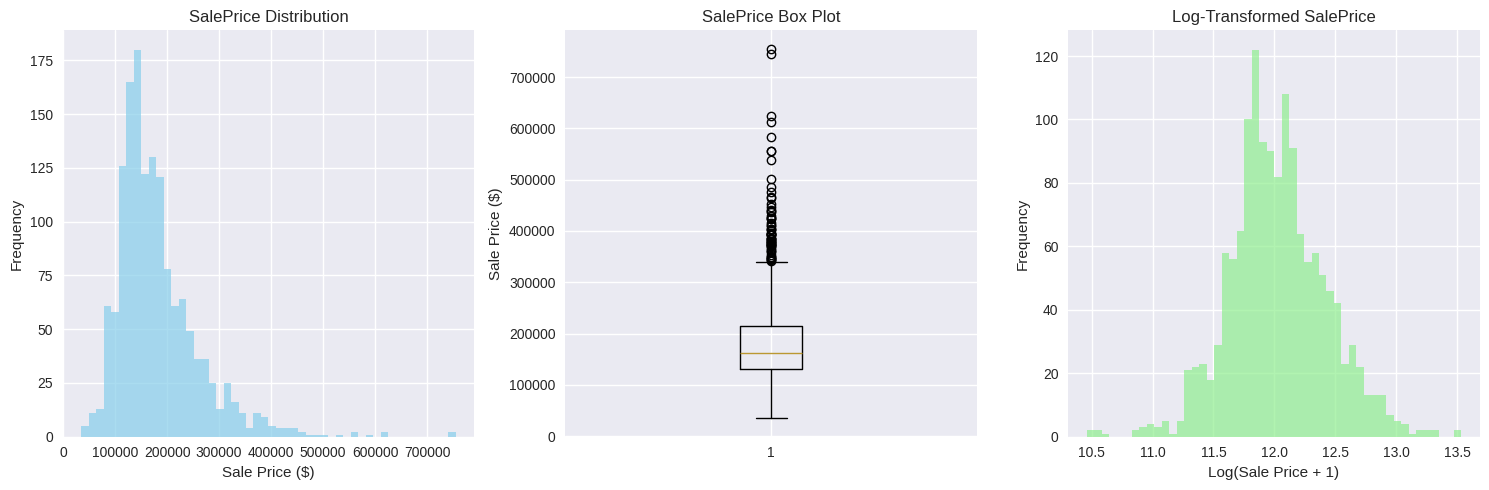

In [11]:
# Target variable analysis
target_col = 'SalePrice'
if target_col in df.columns:
    print("Target Variable Analysis (SalePrice):")
    print(f"Mean: ${df[target_col].mean():,.2f}")
    print(f"Median: ${df[target_col].median():,.2f}")
    print(f"Standard Deviation: ${df[target_col].std():,.2f}")
    print(f"Min: ${df[target_col].min():,.2f}")
    print(f"Max: ${df[target_col].max():,.2f}")
    print(f"Skewness: {df[target_col].skew():.3f}")
    print(f"Kurtosis: {df[target_col].kurtosis():.3f}")
    
    # Target distribution visualization
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Histogram
    axes[0].hist(df[target_col], bins=50, alpha=0.7, color='skyblue')
    axes[0].set_title('SalePrice Distribution')
    axes[0].set_xlabel('Sale Price ($)')
    axes[0].set_ylabel('Frequency')
    
    # Box plot
    axes[1].boxplot(df[target_col])
    axes[1].set_title('SalePrice Box Plot')
    axes[1].set_ylabel('Sale Price ($)')
    
    # Log transformation
    axes[2].hist(np.log1p(df[target_col]), bins=50, alpha=0.7, color='lightgreen')
    axes[2].set_title('Log-Transformed SalePrice')
    axes[2].set_xlabel('Log(Sale Price + 1)')
    axes[2].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()


Key Numeric Feature Distributions:


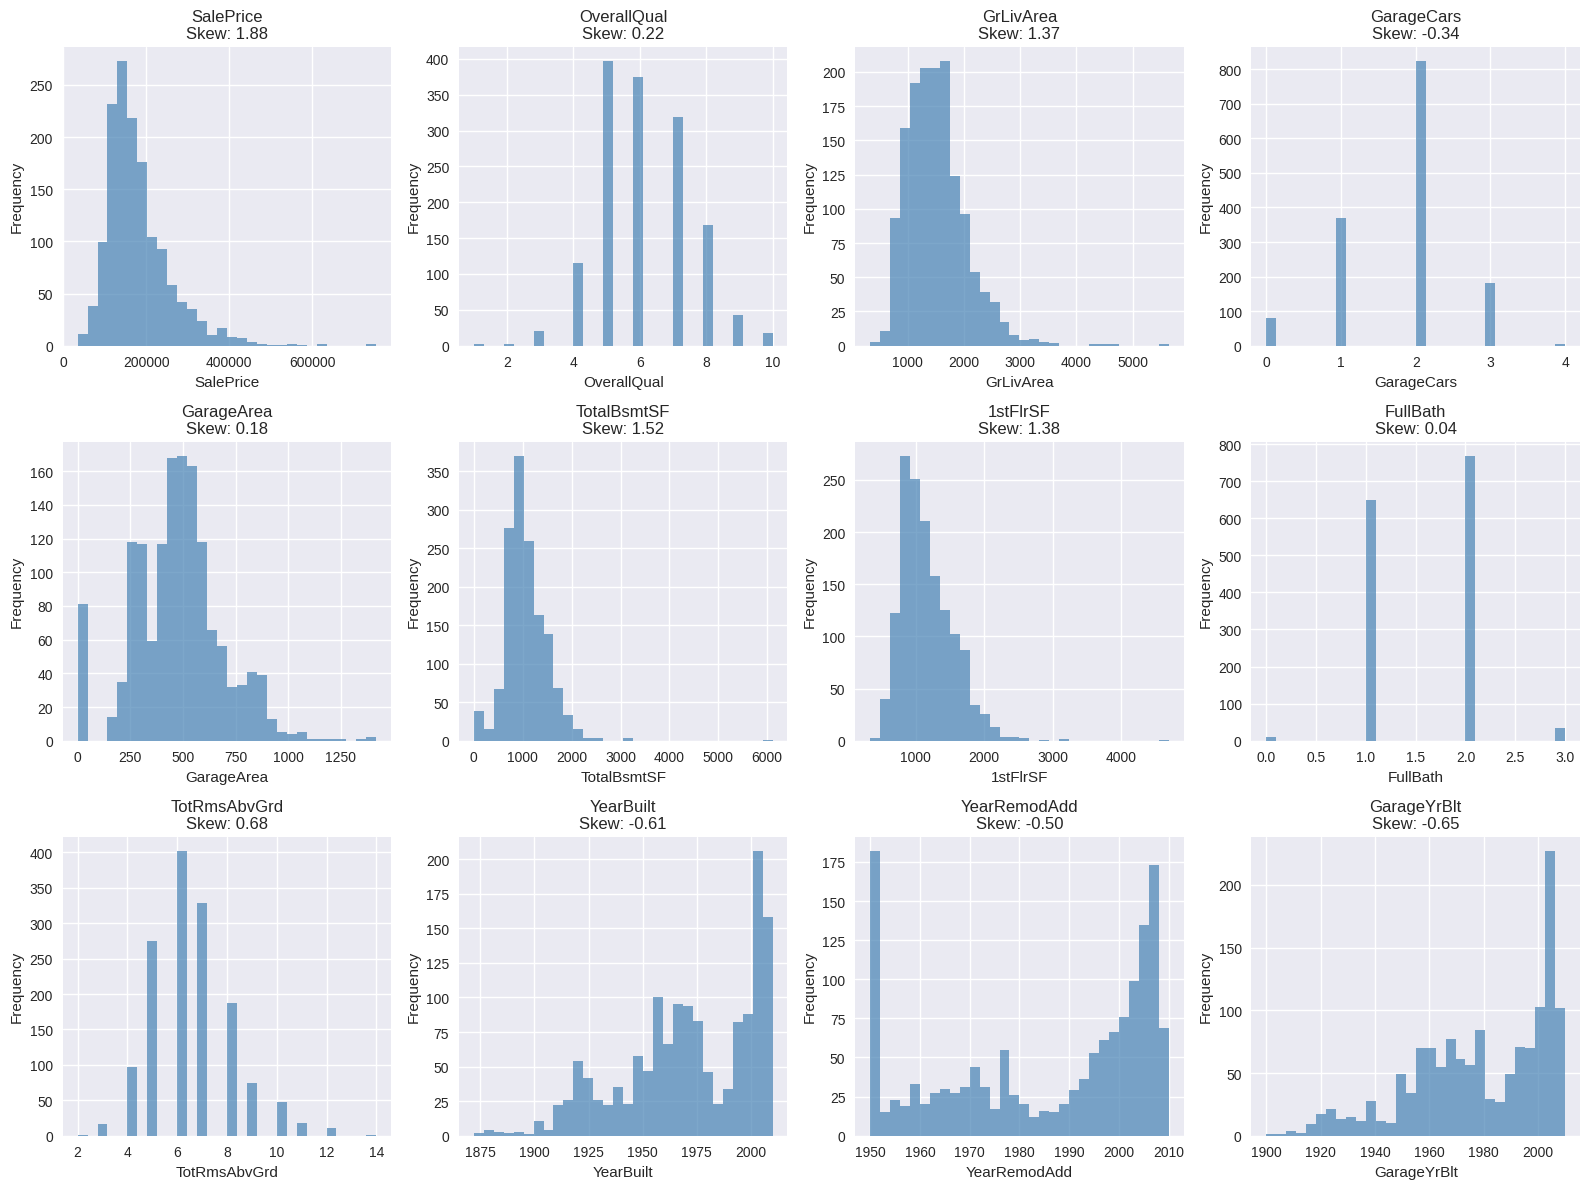

In [12]:
# Distribution analysis for key numeric features
def analyze_numeric_distributions(dataframe, columns, max_plots=12):
    """Analyze distributions of numeric columns"""
    
    # Select top numeric columns by correlation with target (if available)
    if 'SalePrice' in dataframe.columns:
        correlations = dataframe[columns].corrwith(dataframe['SalePrice']).abs().sort_values(ascending=False)
        top_columns = correlations.head(max_plots).index.tolist()
    else:
        top_columns = columns[:max_plots]
    
    n_cols = 4
    n_rows = (len(top_columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    
    for i, col in enumerate(top_columns):
        if i < len(axes):
            axes[i].hist(dataframe[col].dropna(), bins=30, alpha=0.7, color='steelblue')
            axes[i].set_title(f'{col}\nSkew: {dataframe[col].skew():.2f}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
    
    # Hide empty subplots
    for i in range(len(top_columns), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    return top_columns

# Analyze distributions
print("Key Numeric Feature Distributions:")
key_numeric_features = analyze_numeric_distributions(df, numeric_cols)


## 7. Data Quality Summary


In [14]:
# Comprehensive data quality summary
def generate_data_quality_summary(dataframe):
    """Generate comprehensive data quality summary"""
    
    summary = {
        'Dataset Overview': {
            'Total Rows': f"{dataframe.shape[0]:,}",
            'Total Columns': f"{dataframe.shape[1]:,}",
            'Memory Usage': f"{dataframe.memory_usage(deep=True).sum() / 1024**2:.2f} MB",
            'Duplicate Rows': f"{dataframe.duplicated().sum():,}"
        },
        
        'Data Types': {
            'Numeric Columns': f"{len(dataframe.select_dtypes(include=[np.number]).columns):,}",
            'Categorical Columns': f"{len(dataframe.select_dtypes(include=['object']).columns):,}",
            'Boolean Columns': f"{len(dataframe.select_dtypes(include=['bool']).columns):,}"
        },
        
        'Data Quality': {
            'Columns with Missing Values': f"{dataframe.isnull().any().sum():,}",
            'Total Missing Values': f"{dataframe.isnull().sum().sum():,}",
            'Missing Value Percentage': f"{(dataframe.isnull().sum().sum() / (dataframe.shape[0] * dataframe.shape[1]) * 100):.2f}%"
        }
    }
    
    # Outlier summary
    numeric_cols = dataframe.select_dtypes(include=[np.number]).columns
    outlier_counts = []
    for col in numeric_cols:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = len(dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)])
        outlier_counts.append(outliers)
    
    summary['Outlier Analysis'] = {
        'Columns with Outliers': f"{len([x for x in outlier_counts if x > 0]):,}",
        'Total Outliers': f"{sum(outlier_counts):,}",
        'Average Outliers per Column': f"{np.mean(outlier_counts):.1f}"
    }
    
    return summary

# Generate and display summary
quality_summary = generate_data_quality_summary(df)

print("=== DATA QUALITY SUMMARY ===\n")
for category, metrics in quality_summary.items():
    print(f"{category}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print()


=== DATA QUALITY SUMMARY ===

Dataset Overview:
  Total Rows: 1,460
  Total Columns: 81
  Memory Usage: 3.43 MB
  Duplicate Rows: 0

Data Types:
  Numeric Columns: 38
  Categorical Columns: 43
  Boolean Columns: 0

Data Quality:
  Columns with Missing Values: 19
  Total Missing Values: 7,829
  Missing Value Percentage: 6.62%

Outlier Analysis:
  Columns with Outliers: 31
  Total Outliers: 1,657
  Average Outliers per Column: 43.6

